<h2 style="color:black"><b>Task - 2 : Prediction using Unupervised ML</b></h2>

<h4 style="color:black"><b>K-Means Clustering</b></h4>

<h4 style="color:black">In this section we will see how the Python and Scikit-Learn Library for Machine Learning can be used to implement KMeans Clustering functions. Let's start with simple KMeans Clustering involving Four(4) variables named SepalLength, SepalWidth, PetalLength and PetalWidth.</h4>

<h4 style="color:black"><b>Simple K-Means Clustering</b></h4>

<h4 style="color:black">In this Clustering Task we are going to predict the optimum number of clusters. This is a simple K-Means Clustering task.

<h2 style="color:black">Author: Vedant Pandya</h2>

In [1]:
#Let's import the libraries we are going to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
print("Libraries are imported.")

Libraries are imported.


In [2]:
#Import the data from the CSV File
iris = pd.read_csv("Task_2_data.csv")
print("Dataset imported Successfully!")
iris.head(10)

Dataset imported Successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.drop('Id', inplace = True, axis = 1)

In [4]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
len(iris)

150

In [6]:
len(iris.columns)

5

In [7]:
iris.shape

(150, 5)

In [8]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
print('Dataset Info: {}'.format(iris.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info: None


In [10]:
print('Dataset Description: \n\n{}'.format(iris.describe()))

Dataset Description: 

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [11]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

<h4 style="color:black">Visualising the Data through the BoxPlot</h4>

<AxesSubplot:xlabel='SepalLengthCm'>

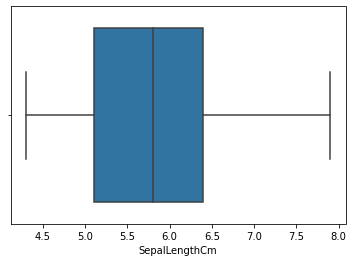

In [13]:
sns.boxplot(iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

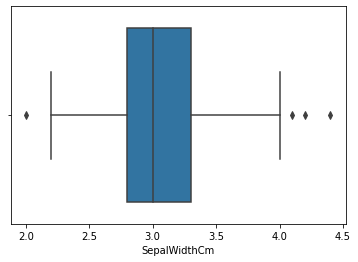

In [14]:
sns.boxplot(iris['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

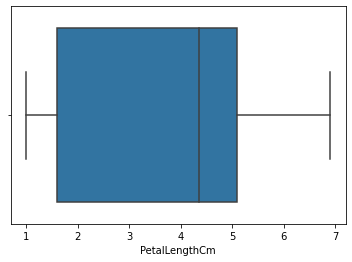

In [15]:
sns.boxplot(iris['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

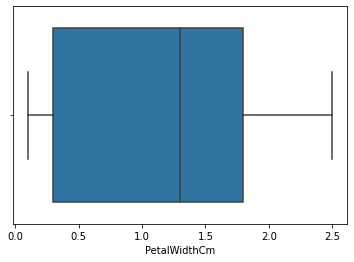

In [16]:
sns.boxplot(iris['PetalWidthCm'])

<h4 style="color:black">BoxPlot are usually used in Exploratory Data Analysis (EDA) for specifically indicating whether there are any potential unusual observation or outliers present in the data set or not.</h4>

In [17]:
def outlier_detect(iris):
    for i in iris.describe().columns:
        Q1 = iris.describe().at['25%', i]
        Q3 = iris.describe().at['75%', i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        iris[i] = iris[i].mask(iris[i] < LTV, LTV)
        iris[i] = iris[i].mask(iris[i] > UTV, UTV)
    return iris

In [18]:
iris = outlier_detect(iris)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [21]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


[Text(0, 0, 'SepalLengthCm'),
 Text(0, 1, 'SepalWidthCm'),
 Text(0, 2, 'PetalLengthCm'),
 Text(0, 3, 'PetalWidthCm'),
 Text(0, 4, 'Species')]

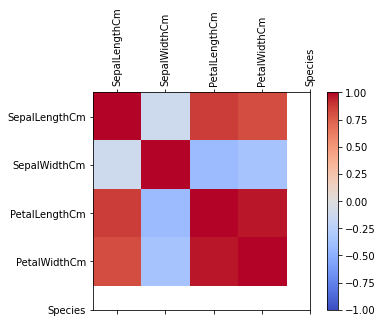

In [22]:
iris1 = iris.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(iris1, cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(iris.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(iris.columns)
ax.set_yticklabels(iris.columns)

<AxesSubplot:>

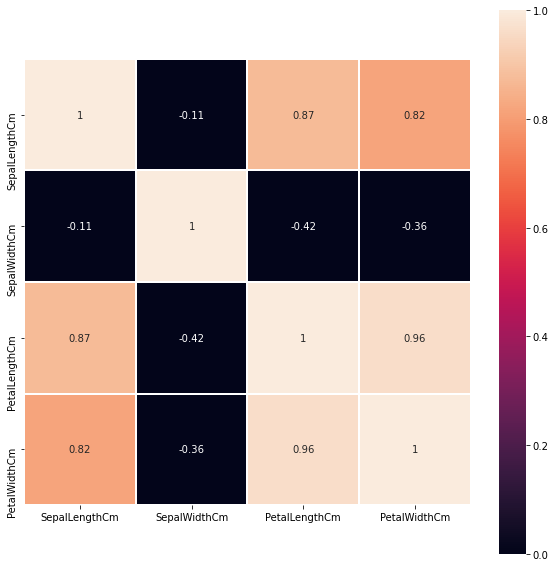

In [23]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(iris1, vmin = 0, vmax = 1, square = True, annot = True, linewidth = 1)

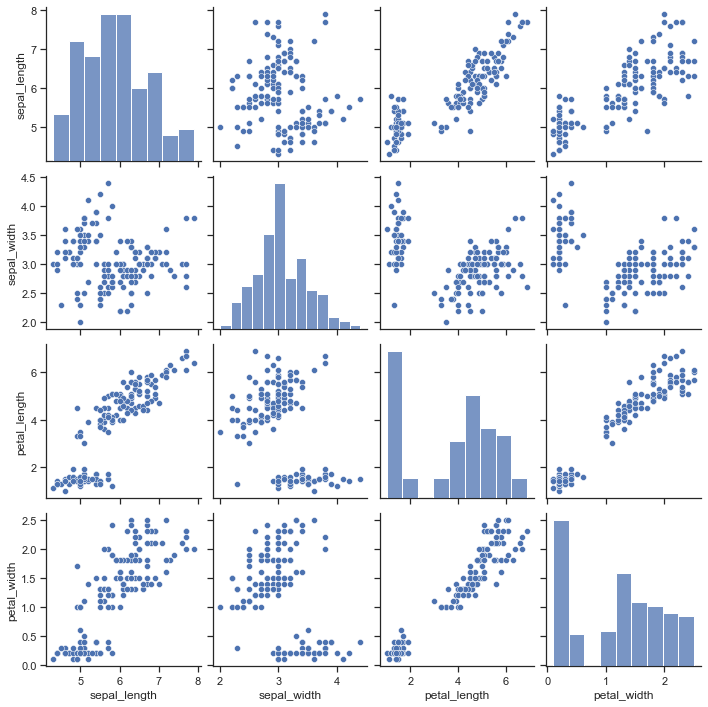

In [24]:
sns.set(style = "ticks", color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)
plt.show()

In [25]:
pd.DataFrame.drop_duplicates(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<h4 style="color:black"><b>Finding the optimum number of Clusters for K_Means Classification</b></h4>

In [26]:
x = iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

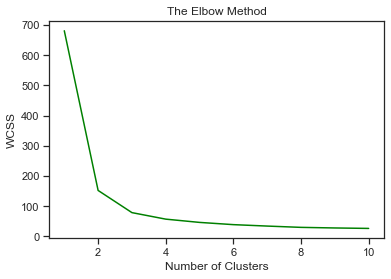

In [27]:
plt.plot(range(1, 11), wcss, color = "green")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

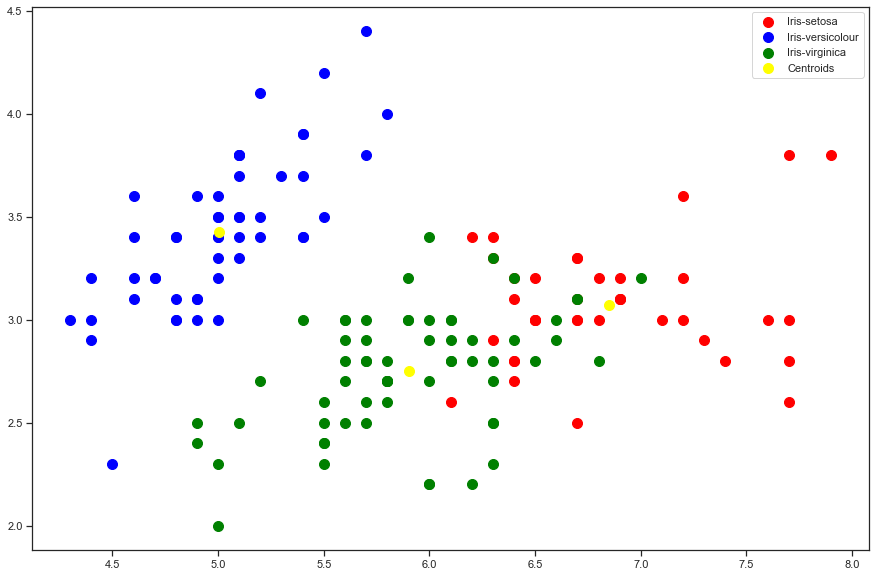

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

<h2 style="color:black">Thank You!</h2>